In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("Cleaned_500_Entry_Dataset.csv")
data.head()

,Height (Feet),Weight (Kg),Age,Gender,Past Medical History,BMI Category
0,5.1,48,64,Male,High BP,Normal
1,5.6,49,58,Male,NaN,Underweight
2,6.4,87,55,Male,Low BP,Normal
3,4.9,44,43,Male,Diabetes,Normal
4,6.0,58,27,Male,High BP,Underweight


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
X = data[['Height (Feet)', 'Weight (Kg)', 'Age', 'Gender', 'Past Medical History']]
y = data['BMI Category']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
categorical_columns = ['Gender', 'Past Medical History']
numerical_columns = ['Height (Feet)', 'Weight (Kg)', 'Age']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])
X_encoded = X.copy()

In [3]:
X_encoded.head()

,Height (Feet),Weight (Kg),Age,Gender,Past Medical History
0,5.1,48,64,1,1
1,5.6,49,58,1,3
2,6.4,87,55,1,2
3,4.9,44,43,1,0
4,6.0,58,27,1,1


In [4]:
y_encoded[:5]

array([0, 3, 0, 0, 3])

In [5]:
data.iloc[:,0:5]=X_encoded.iloc[:,:]
data.iloc[:,5]=y_encoded
data.head()

,Height (Feet),Weight (Kg),Age,Gender,Past Medical History,BMI Category
0,5.1,48,64,1,1,0
1,5.6,49,58,1,3,3
2,6.4,87,55,1,2,0
3,4.9,44,43,1,0,0
4,6.0,58,27,1,1,3


In [6]:
data.shape

(500, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Height (Feet)         500 non-null    float64
 1   Weight (Kg)           500 non-null    int64  
 2   Age                   500 non-null    int64  
 3   Gender                500 non-null    object 
 4   Past Medical History  500 non-null    object 
 5   BMI Category          500 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 23.6+ KB


In [8]:
data.describe()

,Height (Feet),Weight (Kg),Age
count,500.000000,500.000000,500.000000
mean,5.489000,69.602000,44.066000
std,0.576579,17.779872,15.371865
min,4.500000,40.000000,18.000000
25%,5.000000,54.750000,30.750000
50%,5.500000,69.500000,44.000000
75%,6.000000,85.000000,57.000000
max,6.500000,100.000000,70.000000


array([[<Axes: title={'center': 'Height (Feet)'}>,
        <Axes: title={'center': 'Weight (Kg)'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

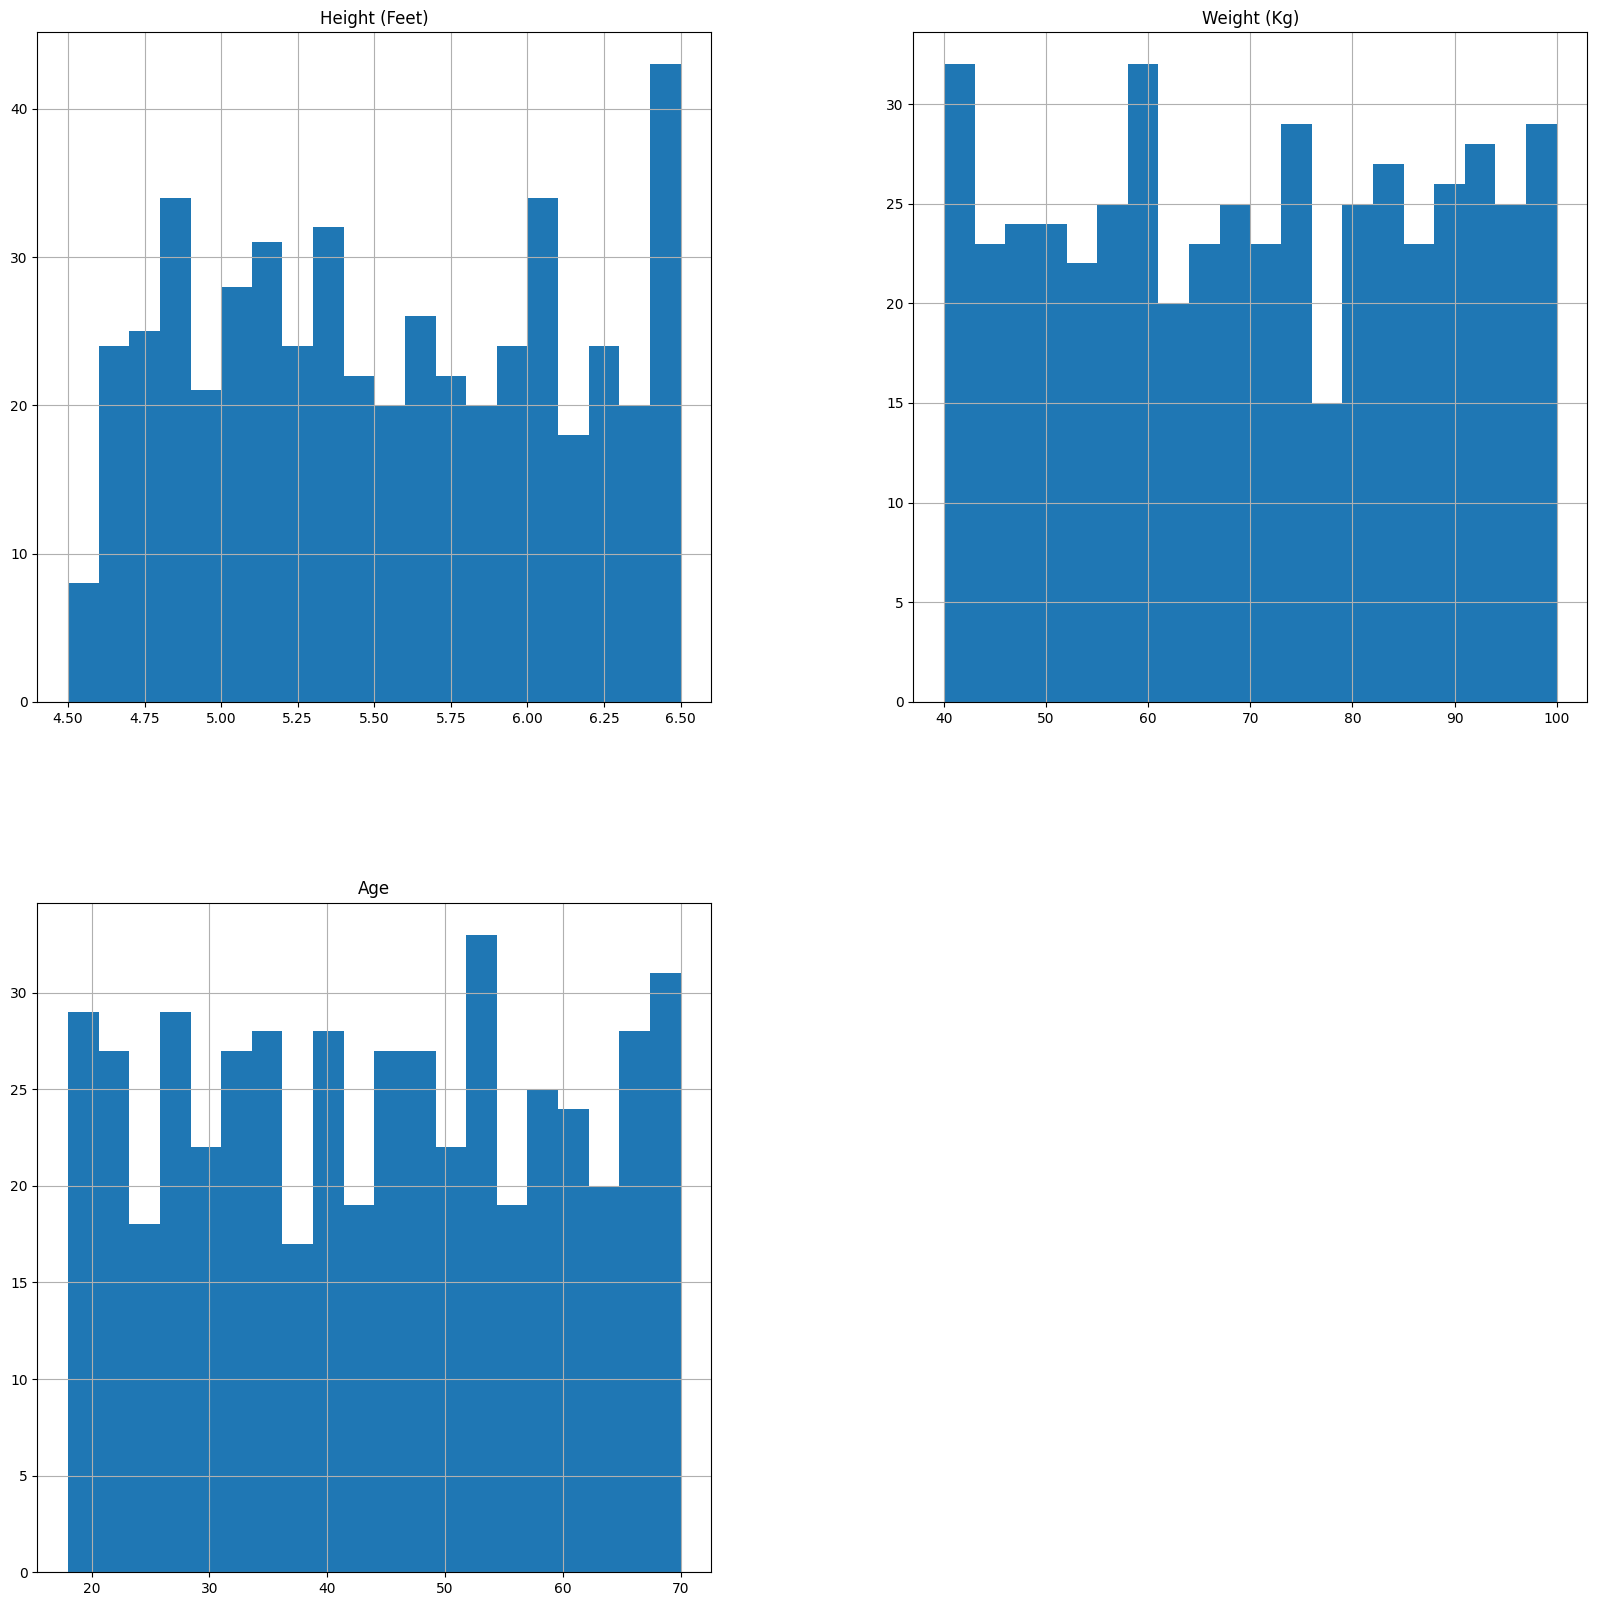

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20,20))

## Splitting into Train and Test data sets

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    #print(shuffled)
    test_size = int(test_ratio*len(data))
    trainIndices = shuffled[test_size:]
    testIndices = shuffled[:test_size]
    return data.iloc[trainIndices],data.iloc[testIndices]
train_set, test_set = split_train_test(data, 0.2)

In [11]:
data['Gender'].value_counts()

Gender
1    281
0    219
Name: count, dtype: int64

In [12]:
data['BMI Category'].value_counts()

BMI Category
1    149
0    144
3    114
2     93
Name: count, dtype: int64

## Feature Scaling Using MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(data)
new_data = pd.DataFrame(X, columns=data.columns)
new_data.describe()

,Height (Feet),Weight (Kg),Age,Gender,Past Medical History,BMI Category
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.49450,0.493367,0.501269,0.562000,0.500667,0.451333
std,0.28829,0.296331,0.295613,0.496638,0.372453,0.374642
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.245833,0.245192,0.000000,0.000000,0.000000
50%,0.50000,0.491667,0.500000,1.000000,0.666667,0.333333
75%,0.75000,0.750000,0.750000,1.000000,0.666667,0.666667
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting using StratifiedShuffleSplit

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in sss.split(data, data['BMI Category']):
    strat_train_set=data.loc[trainIndex]
    strat_test_set=data.loc[testIndex]
x_train = strat_train_set.drop("BMI Category",axis=1)
y_train = strat_train_set["BMI Category"]
x_test = strat_test_set.drop("BMI Category",axis=1)
y_test = strat_test_set["BMI Category"]

In [15]:
strat_train_set['BMI Category'].value_counts()

BMI Category
1    119
0    115
3     91
2     75
Name: count, dtype: int64

In [16]:
strat_test_set['BMI Category'].value_counts()

BMI Category
1    30
0    29
3    23
2    18
Name: count, dtype: int64

In [17]:
119/115,119/91,119/75

(1.0347826086956522, 1.3076923076923077, 1.5866666666666667)

In [18]:
30/29,30/23,30/18

(1.0344827586206897, 1.3043478260869565, 1.6666666666666667)

## Analysing Correlations

In [19]:
selected_features = ['Height (Feet)', 'Weight (Kg)', 'Age']  
corr_matrix = data[selected_features].corr()
corr_matrix

,Height (Feet),Weight (Kg),Age
Height (Feet),1.000000,0.004401,-0.037203
Weight (Kg),0.004401,1.000000,0.040234
Age,-0.037203,0.040234,1.000000


In [20]:
corr_matrix['Age'].sort_values(ascending=False)

Age              1.000000
Weight (Kg)      0.040234
Height (Feet)   -0.037203
Name: Age, dtype: float64

array([[<Axes: xlabel='Height (Feet)', ylabel='Height (Feet)'>,
        <Axes: xlabel='Weight (Kg)', ylabel='Height (Feet)'>,
        <Axes: xlabel='Age', ylabel='Height (Feet)'>],
       [<Axes: xlabel='Height (Feet)', ylabel='Weight (Kg)'>,
        <Axes: xlabel='Weight (Kg)', ylabel='Weight (Kg)'>,
        <Axes: xlabel='Age', ylabel='Weight (Kg)'>],
       [<Axes: xlabel='Height (Feet)', ylabel='Age'>,
        <Axes: xlabel='Weight (Kg)', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>]], dtype=object)

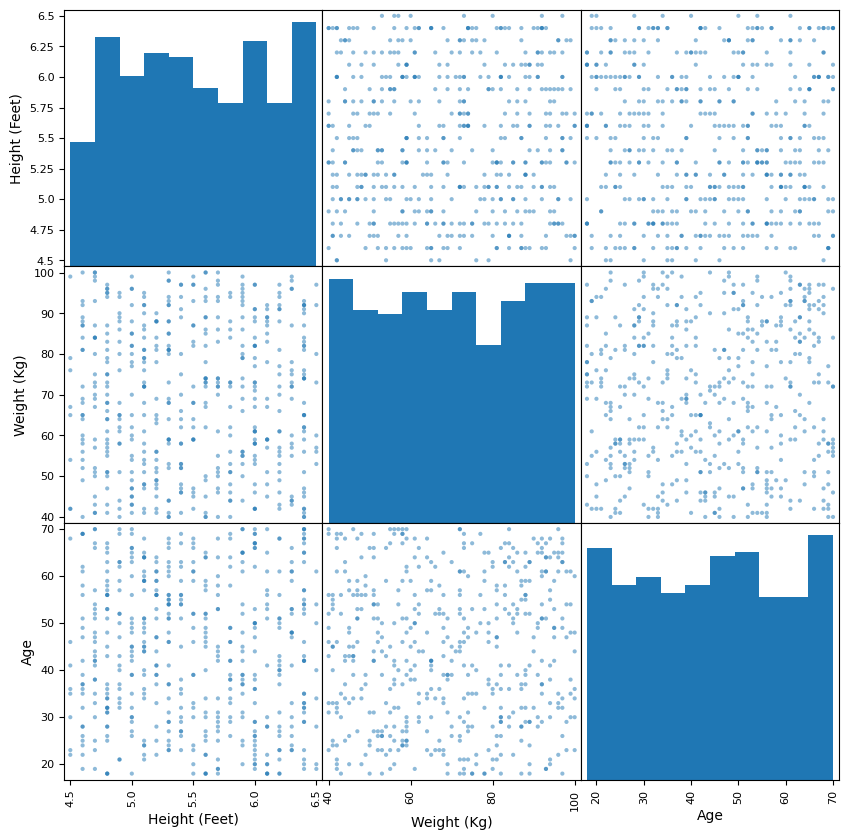

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[selected_features], figsize=(10,10))

## Selecting Best Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure y_train is properly encoded if it contains categorical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

log_reg = LogisticRegression(multi_class='ovr', max_iter=200)
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression (One-vs-Rest) Accuracy: {log_reg_accuracy:.4f}")

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

# Support Vector Classifier (SVC)
svc = SVC(decision_function_shape='ovr', random_state=42)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Classifier (SVC) Accuracy: {svc_accuracy:.4f}")

# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"k-Nearest Neighbors (k-NN) Accuracy: {knn_accuracy:.4f}")


Logistic Regression (One-vs-Rest) Accuracy: 0.8100
Random Forest Classifier Accuracy: 0.8600
Support Vector Classifier (SVC) Accuracy: 0.5800
k-Nearest Neighbors (k-NN) Accuracy: 0.5400


## Best Model : Random Forest Classifier

In [23]:
print(y_test)
print(y_pred_rf)

[3 1 1 2 2 3 2 1 0 0 0 0 3 3 3 3 3 2 3 0 3 1 3 1 1 0 1 0 1 0 3 3 2 3 0 1 2
 1 0 3 3 1 1 2 1 1 1 0 2 0 0 0 0 3 2 2 1 1 3 1 1 0 2 0 1 0 3 2 0 2 2 0 0 1
 1 2 3 1 1 2 0 1 0 1 1 3 1 0 1 3 0 2 0 2 3 3 0 0 0 1]
[3 1 1 2 2 3 1 1 0 2 0 0 3 3 3 0 3 2 3 3 3 1 3 2 1 0 1 0 1 2 3 3 2 0 0 1 2
 1 0 3 3 1 1 0 1 1 1 0 0 0 3 0 0 0 2 1 1 1 3 1 1 0 2 0 1 3 3 2 0 2 2 0 0 1
 1 2 3 1 1 2 2 1 0 1 1 3 1 0 1 3 0 2 0 2 3 3 0 0 0 1]


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

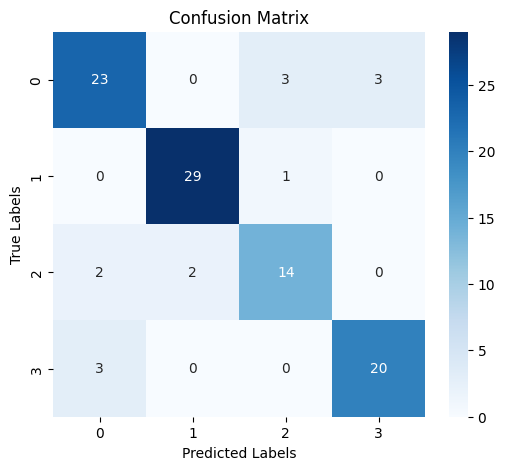

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
gender_encoder = LabelEncoder()
medical_history_encoder = LabelEncoder()

gender_encoder.fit(["Male", "Female"])
medical_history_encoder.fit(["Diabetes", "High BP","Low BP","None"])

# Step 1: Define the sample features
height = 5.7  # Numeric feature
weight = 70   # Numeric feature
age = 23      # Numeric feature
gender = "Male"  # Categorical feature
medical_history = "None"  # Categorical feature

# Step 2: Encode categorical features using LabelEncoder
gender_encoded = gender_encoder.transform([gender])[0]  # Encode gender
medical_history_encoded = medical_history_encoder.transform([medical_history])[0]  # Encode medical history

# Step 3: Combine features into an array
new_sample = np.array([height, weight, age, gender_encoded, medical_history_encoded])

# Step 4: Reshape to match model input shape (1 sample with n features)
new_sample_reshaped = new_sample.reshape(1, -1)
new_sample_reshaped

array([[ 5.7, 70. , 23. ,  1. ,  3. ]])

In [27]:
rf.predict(new_sample_reshaped)

array([0])